In [ ]:
import data_io
from tensorflow.keras.models import load_model

model_file = "./saved_model/cnn_dense"
model = load_model(model_file)

test_loader = data_io.ImageDataGenerator(
    batch_size=1,
    shuffle=False,
    mode='test',
    data_augmentation=False)
y = model.predict(test_loader)


(192, 1)


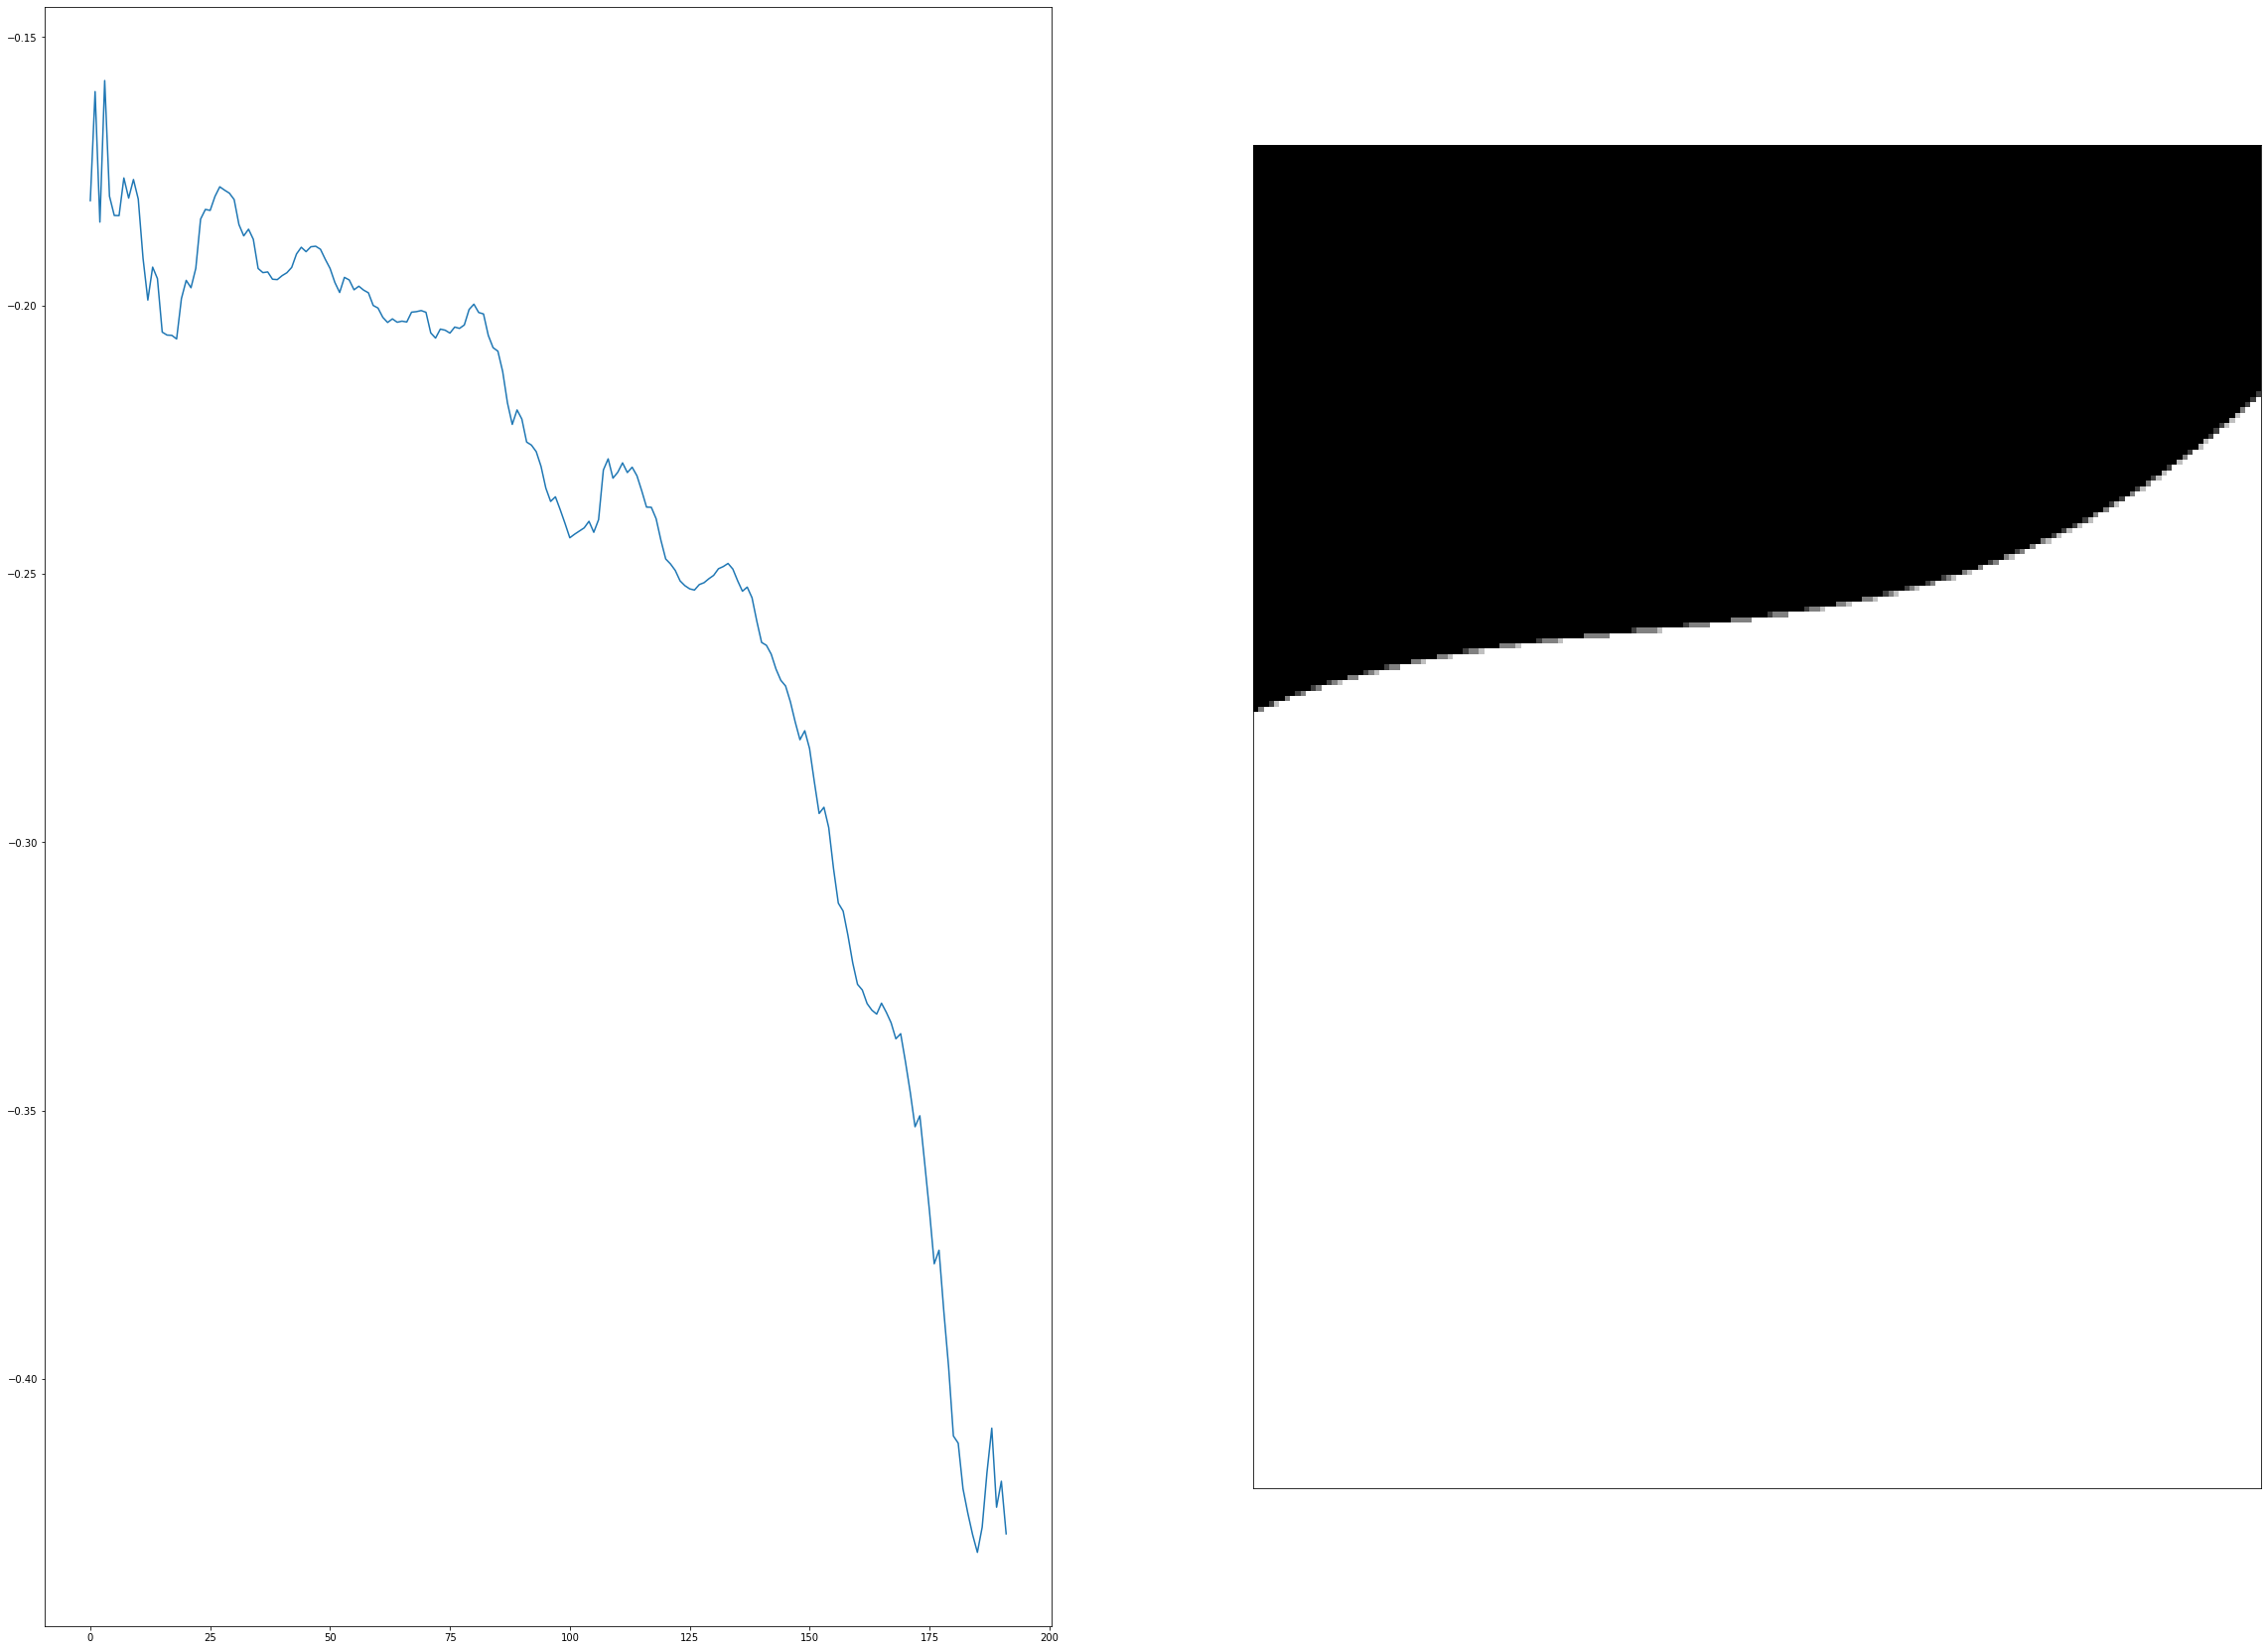

(192, 1)


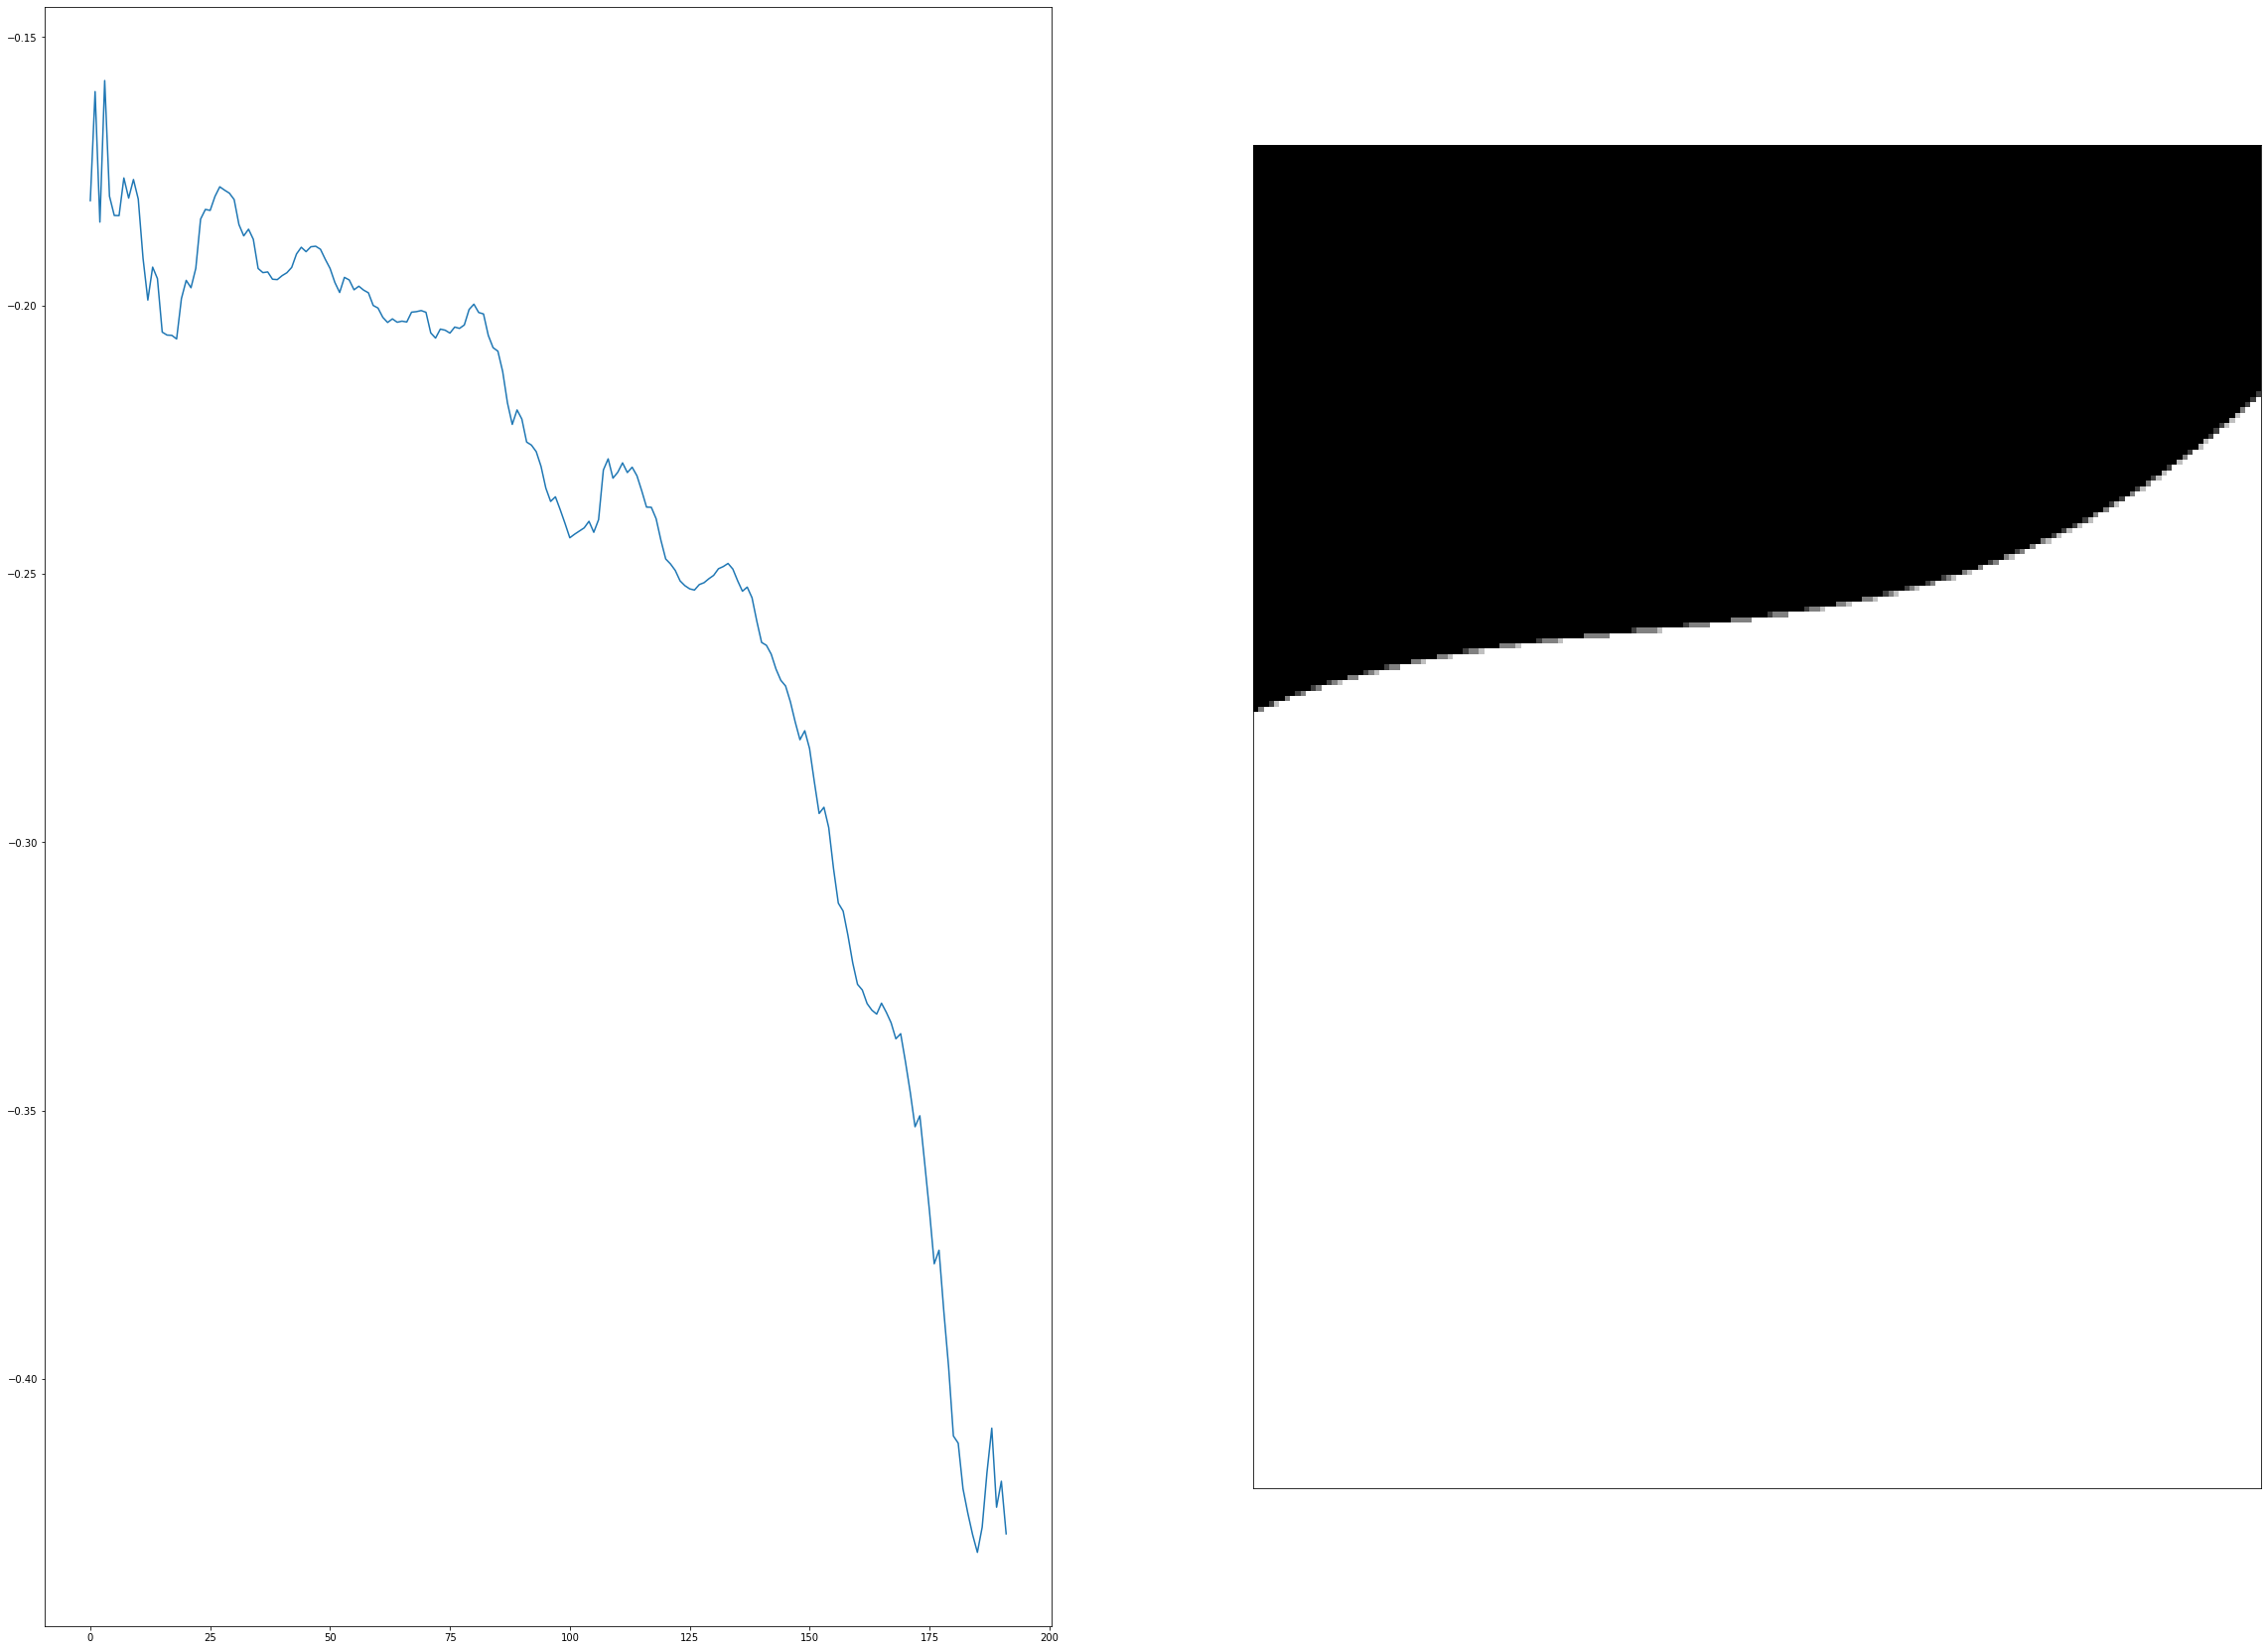

(192, 1)


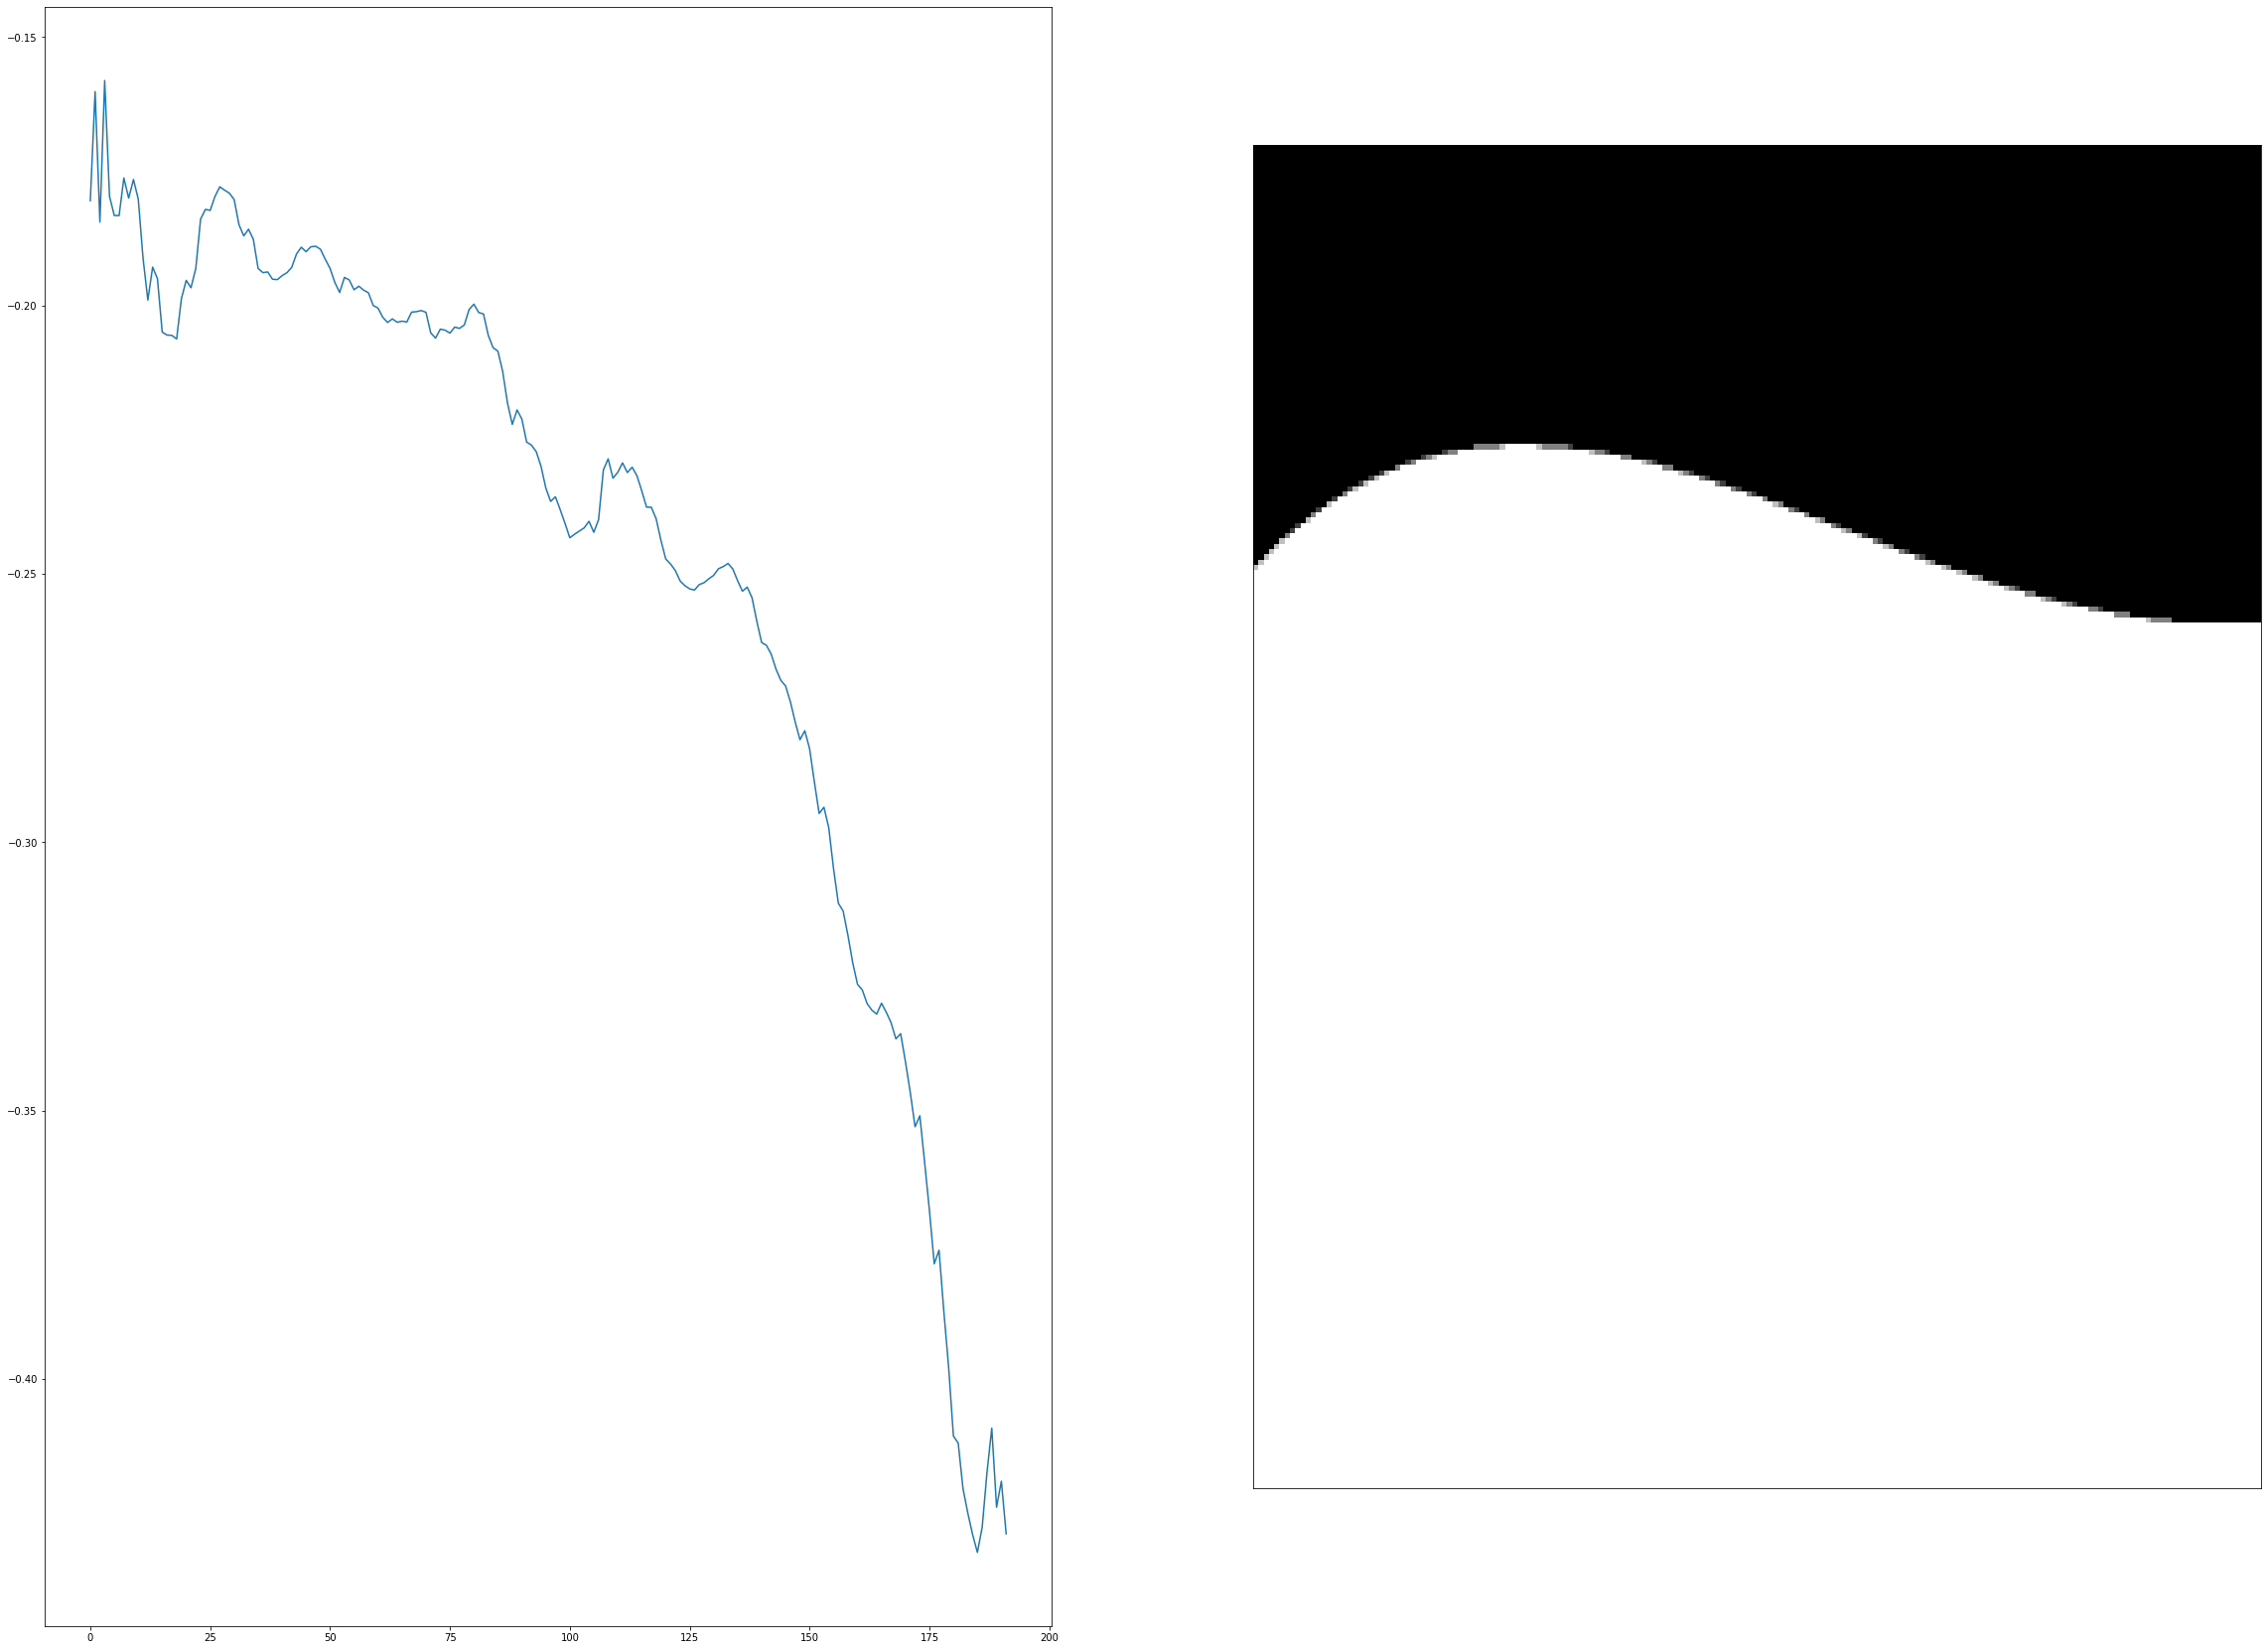

(192, 1)


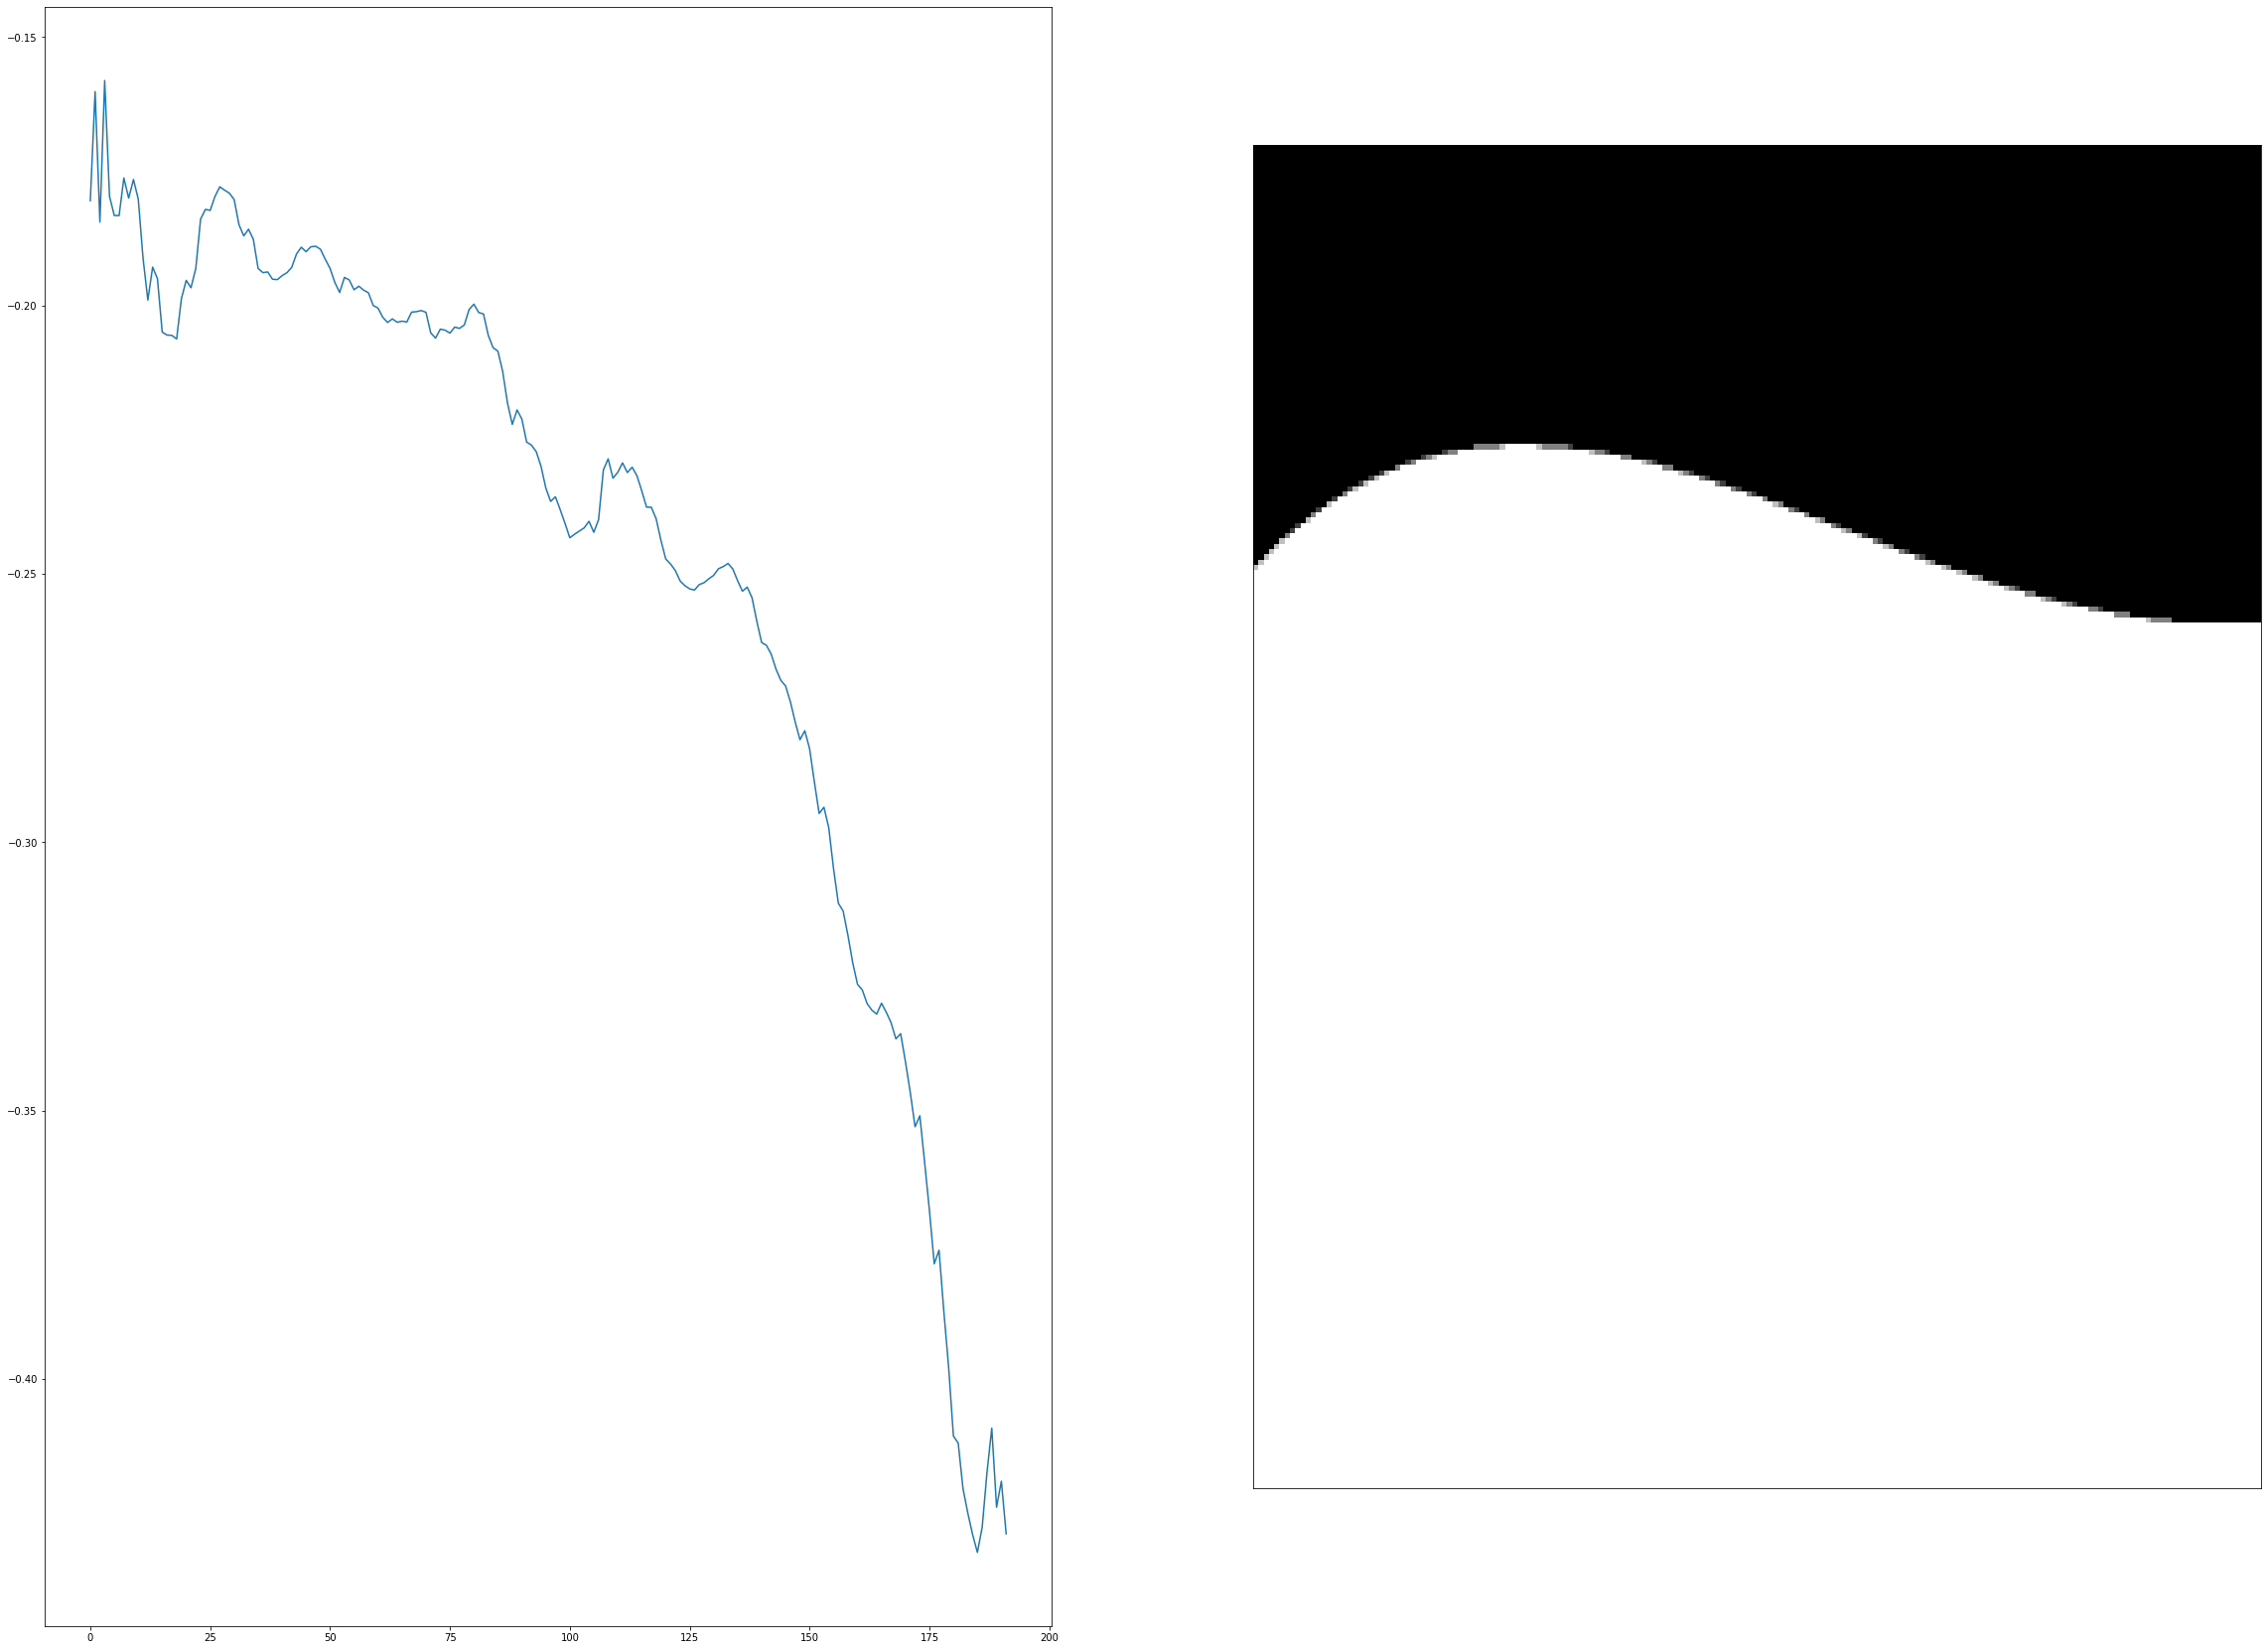

(192, 1)


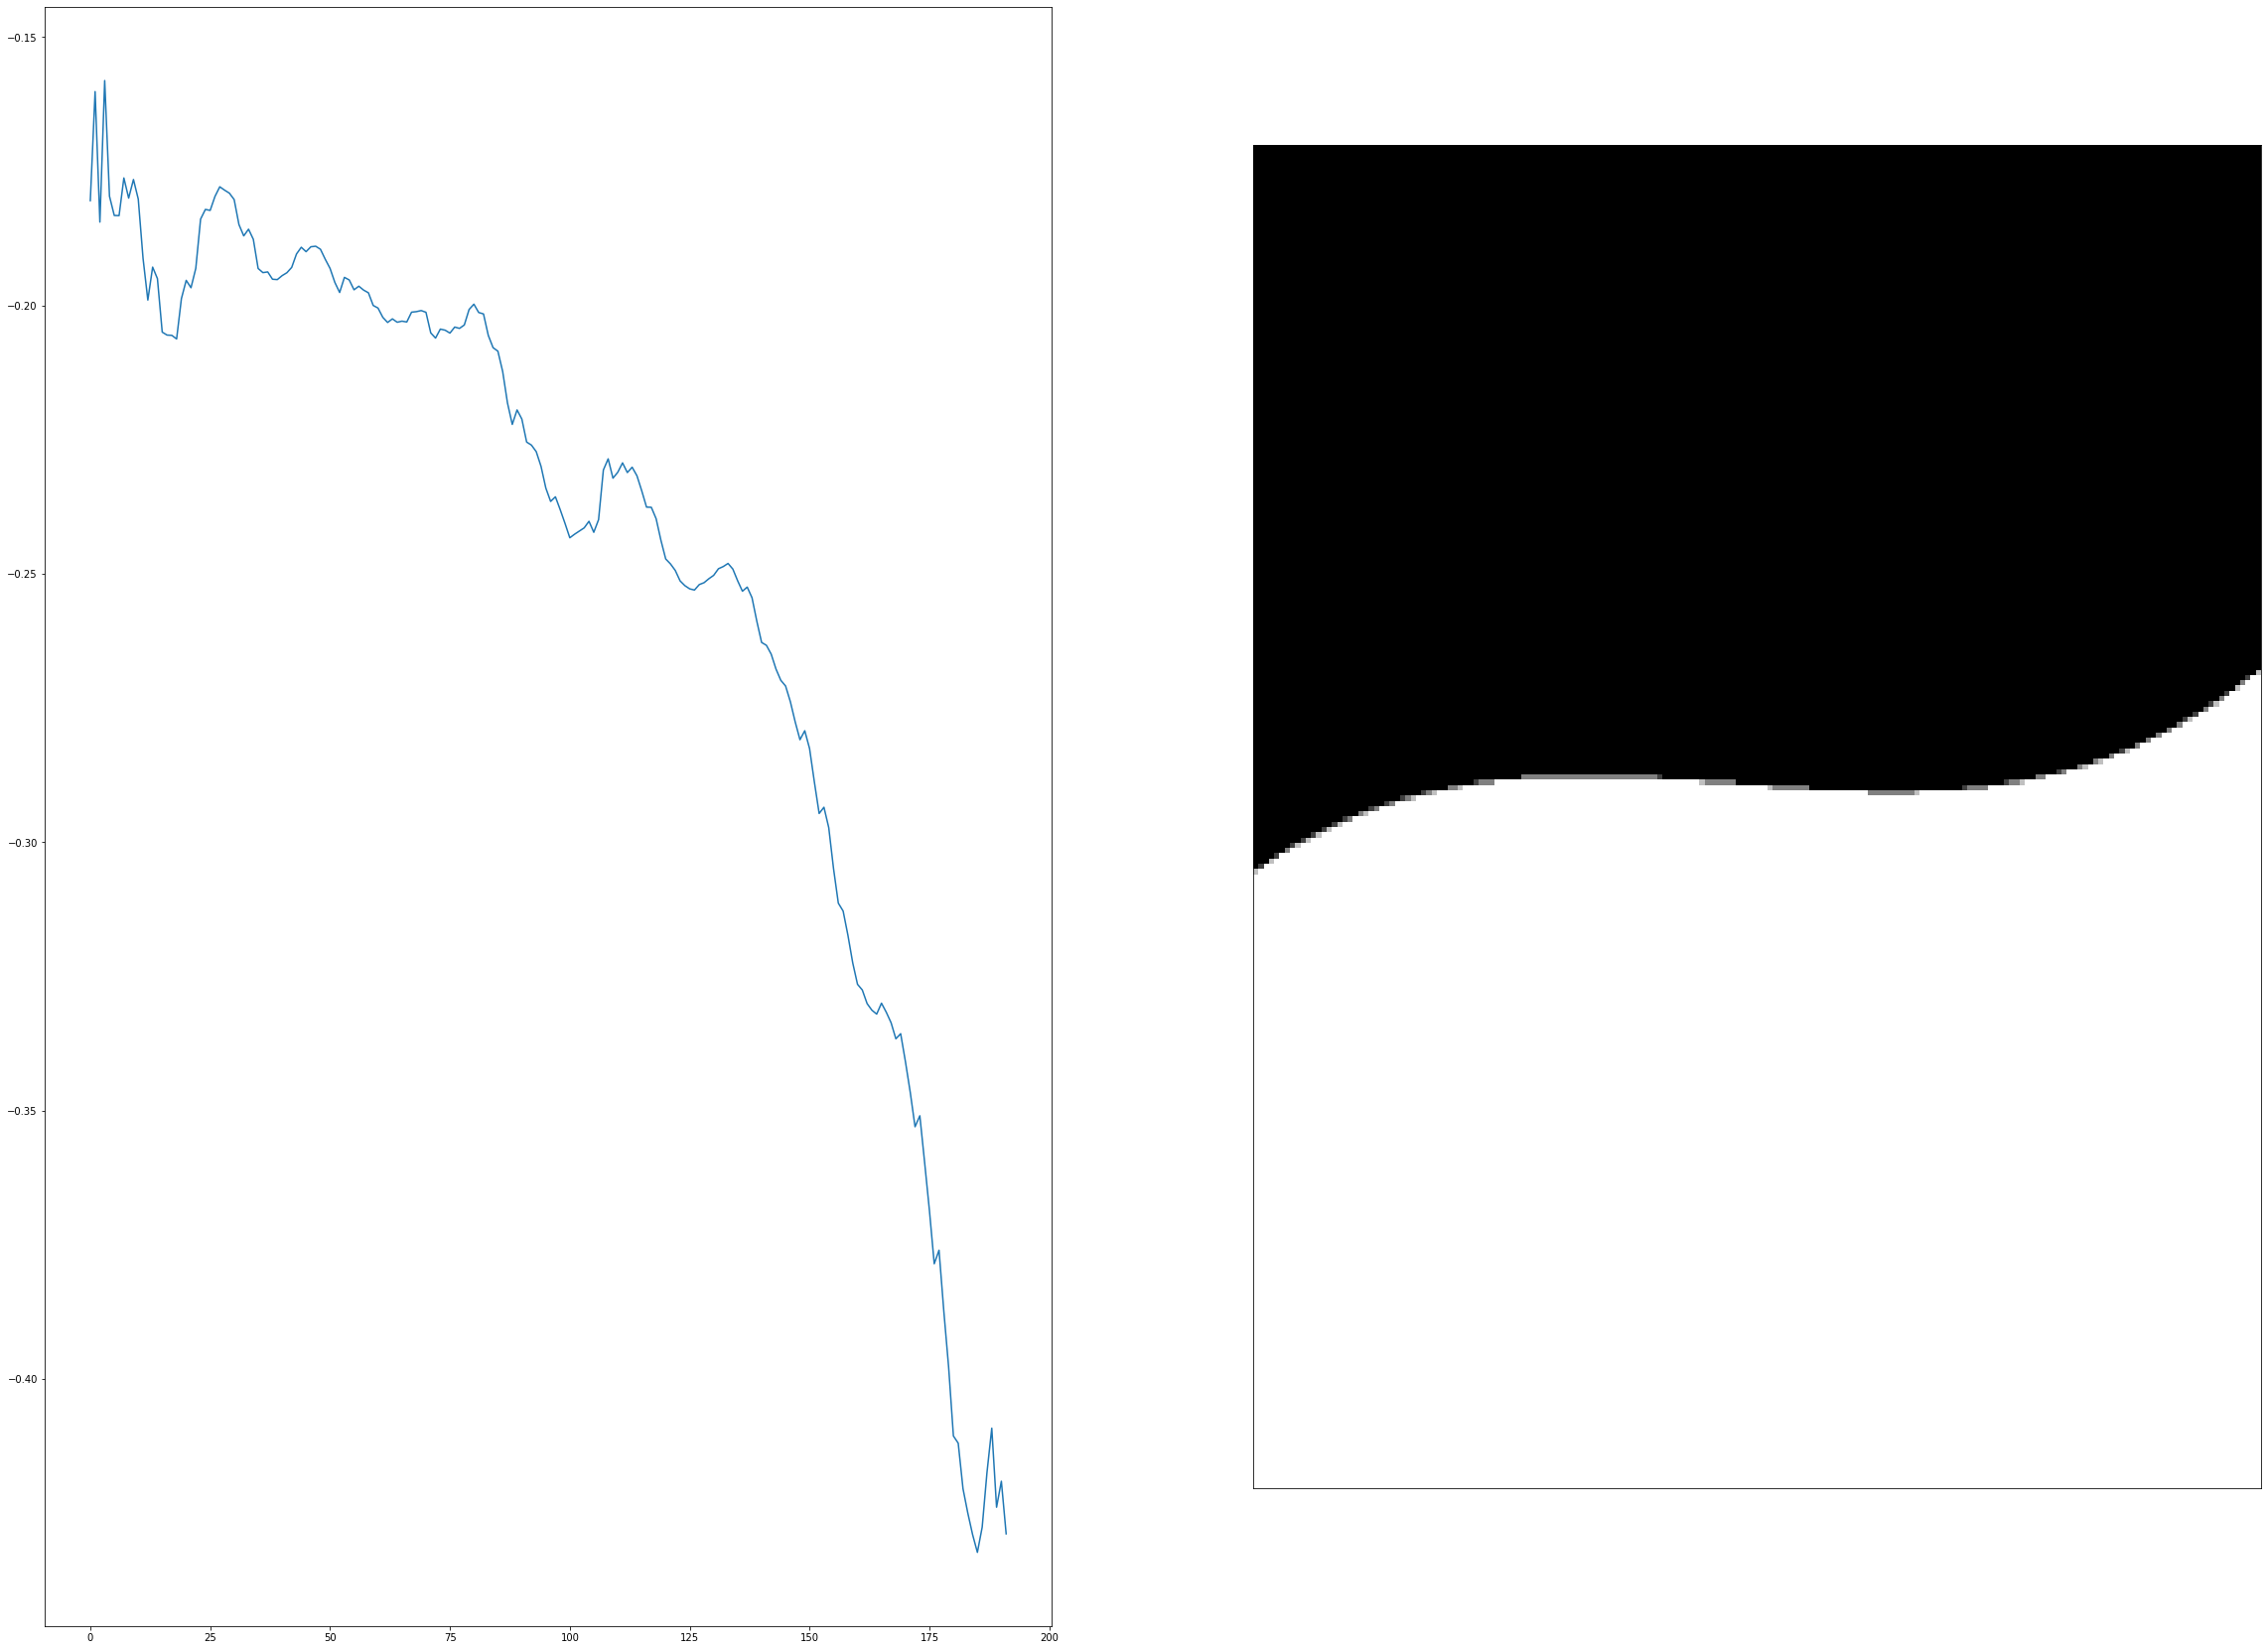

(192, 1)


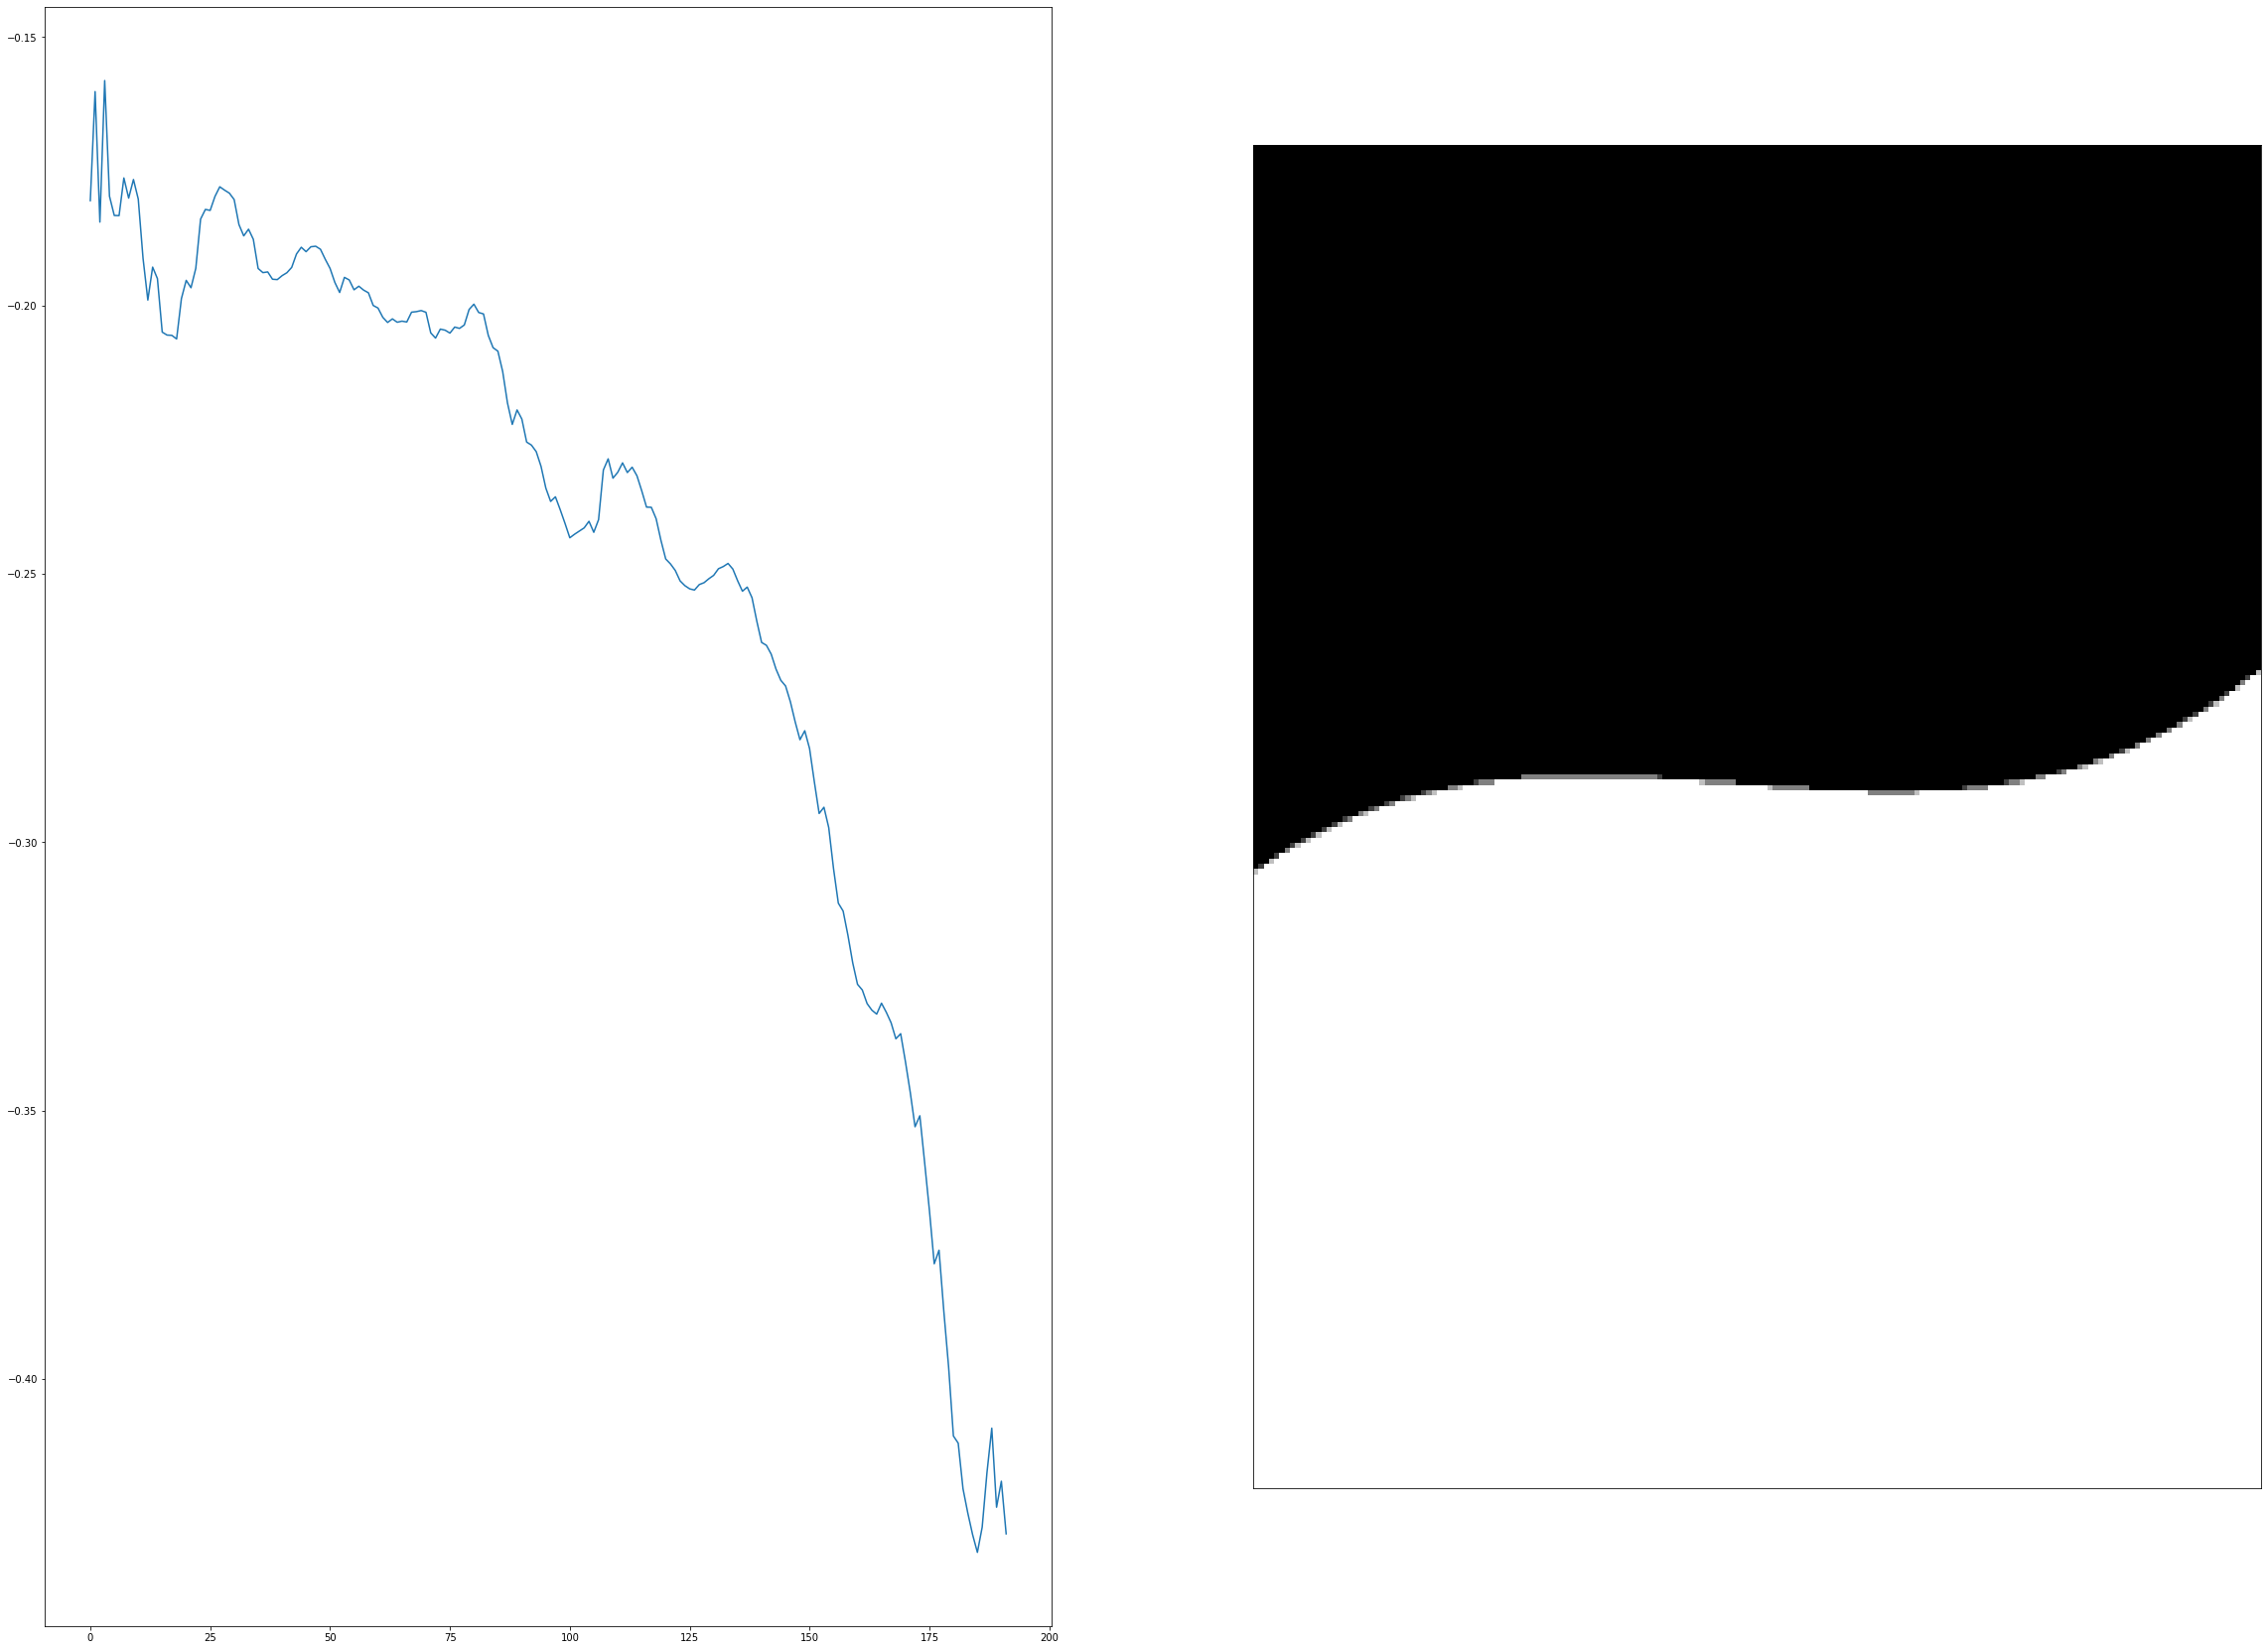

(192, 1)


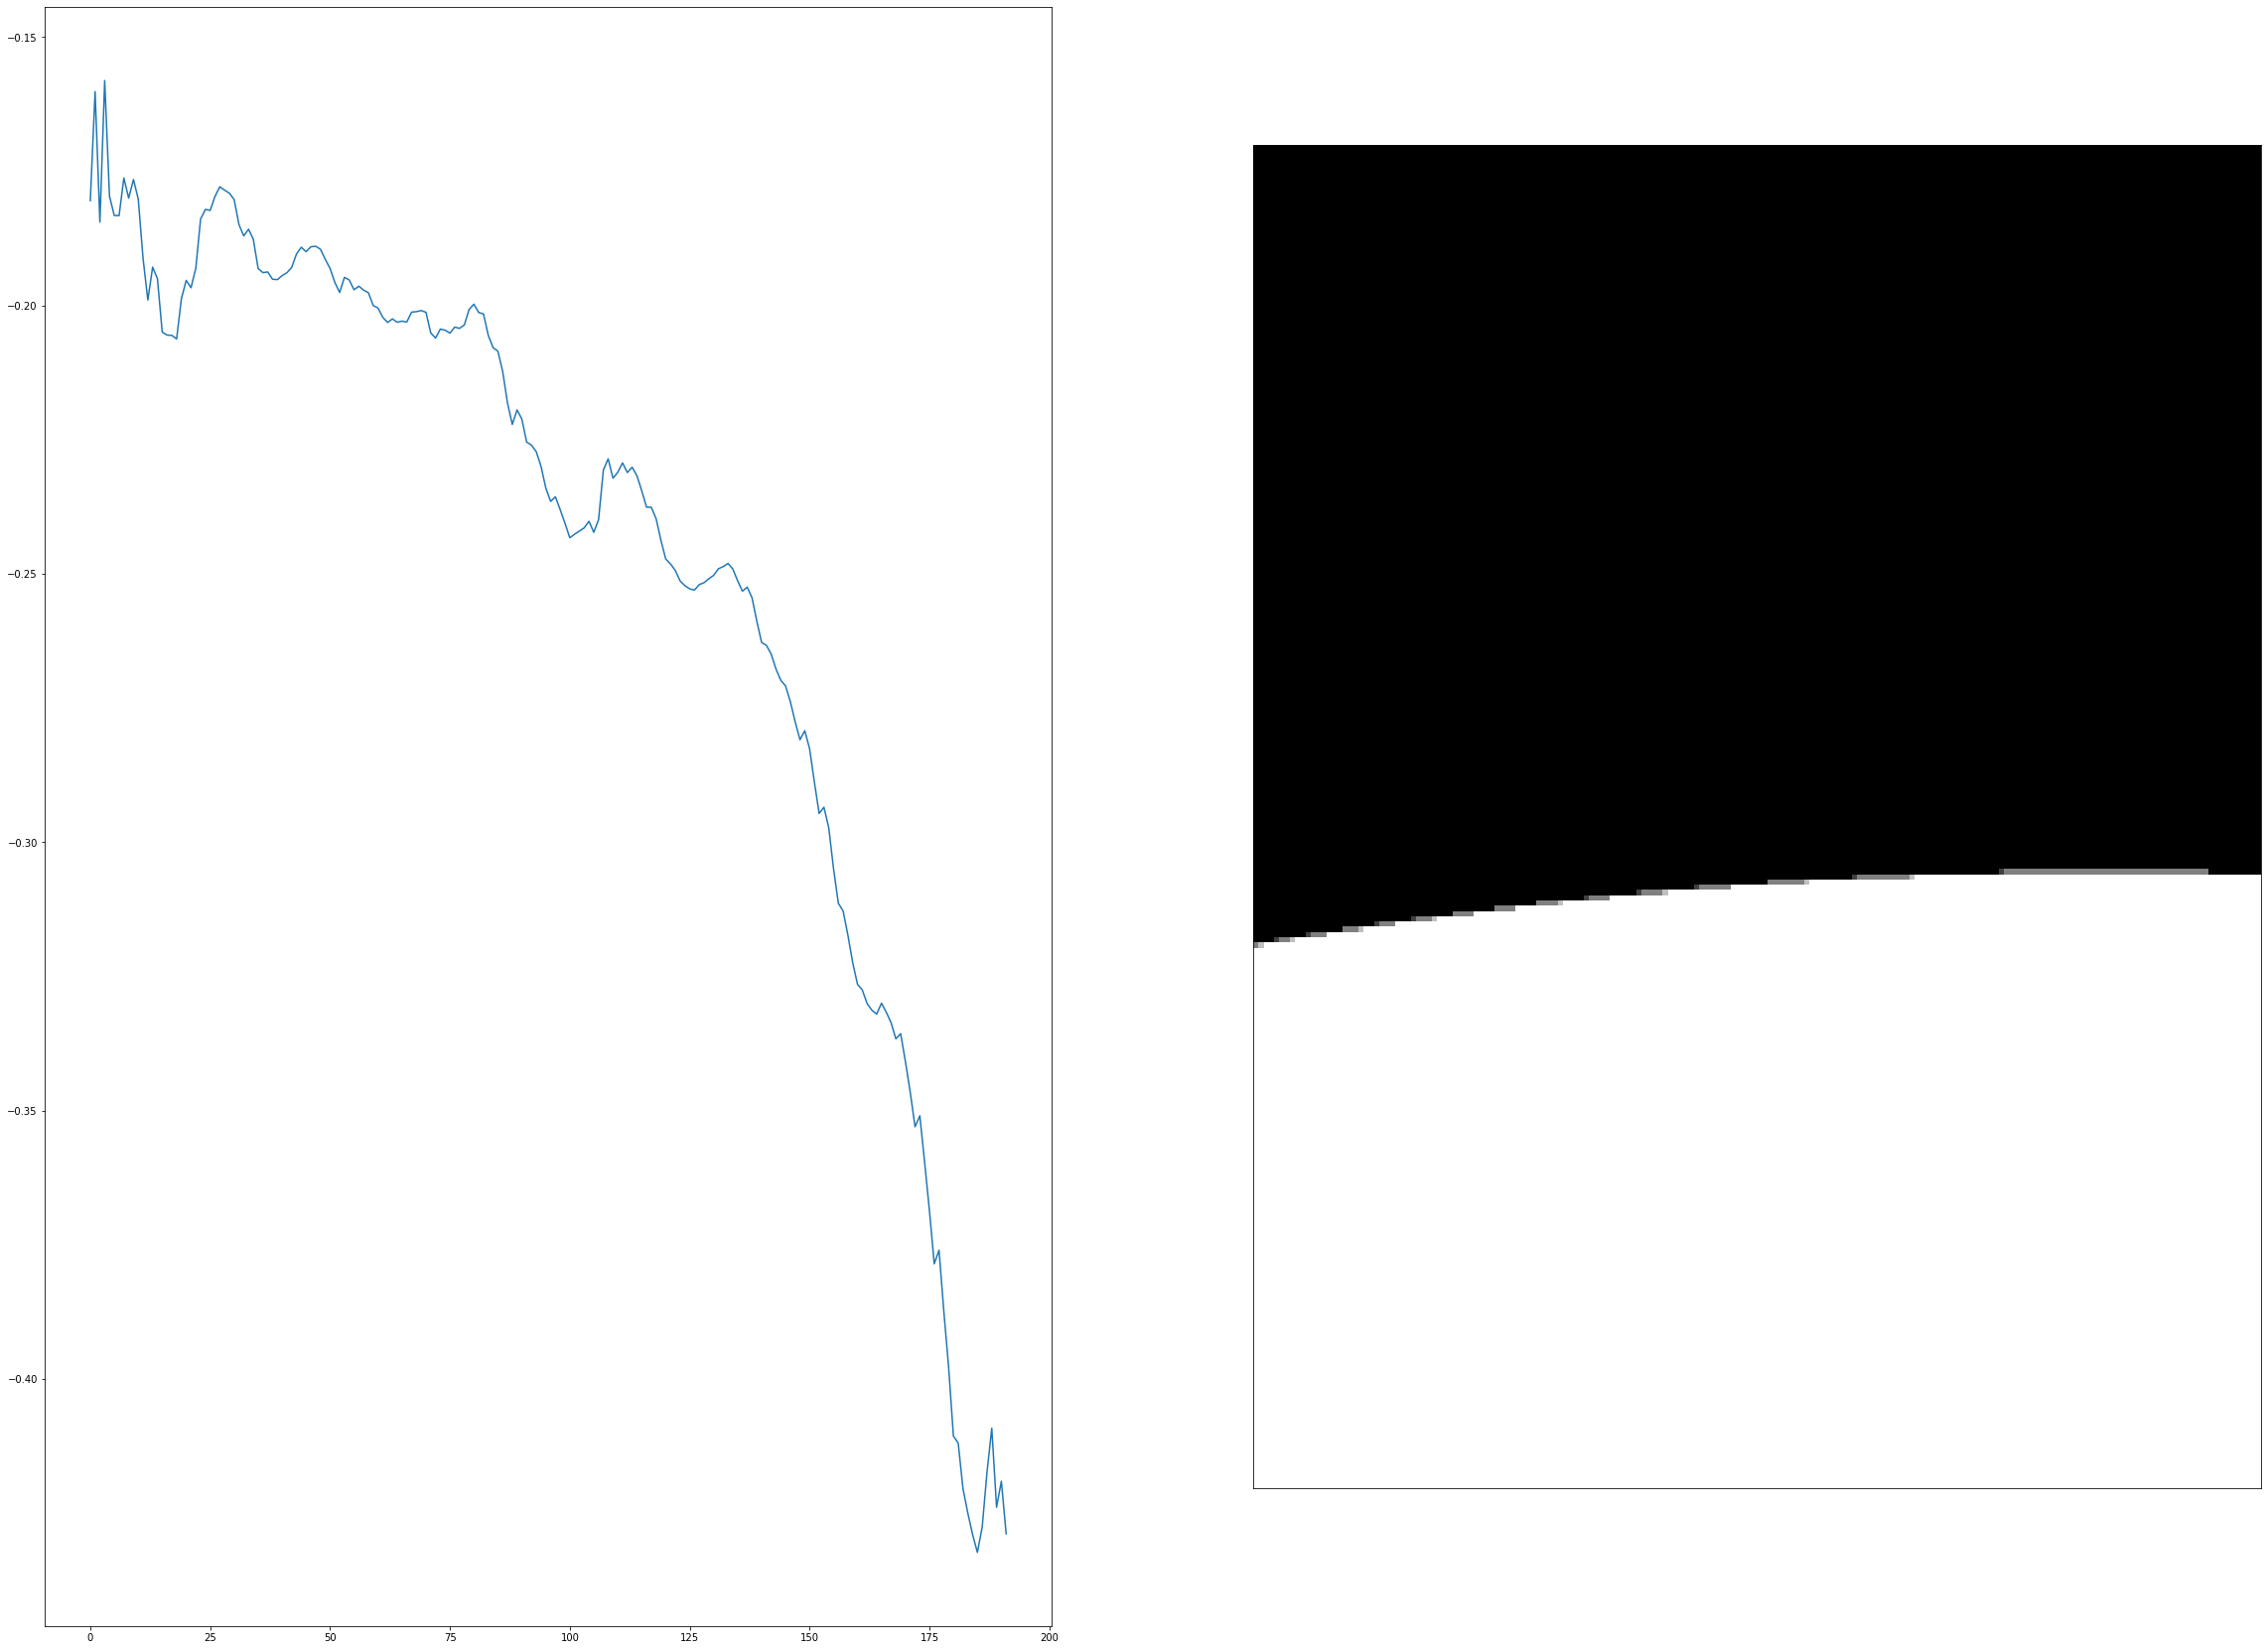

(192, 1)


In [ ]:
from matplotlib import pyplot as plt
from glob import glob

gt_loader = data_io.ImageDataGenerator(
    batch_size=1,
    shuffle=False,
    mode='test',
    data_augmentation=False)

for idx, img in enumerate(y):
    print(img.shape)
    fig, ax  = plt.subplots(1, 2, figsize=(40, 30))
    ax[0].plot(y[0,:,:])
    _, gt = gt_loader.__getitem__(idx)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].imshow(gt[0,:,:], cmap='gray')
    plt.show() 

In [ ]:
from matplotlib import pyplot as plt
from glob import glob

gt_loader = data_io.ImageDataGenerator(
    batch_size=1,
    shuffle=False,
    mode='test',
    data_augmentation=False)

for idx, img in enumerate(y):
    print(img.shape)
    fig, ax  = plt.subplots(1, 2, figsize=(40, 30))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].imshow(y[0,:,:], cmap='gray')
    _, gt = gt_loader.__getitem__(idx)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].imshow(gt[0,:,:], cmap='gray')
    plt.show() 

